<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Проверка-формулы" data-toc-modified-id="Проверка-формулы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка формулы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

* Задача данного исследования - создать модель, которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
* План действий:
    * Получить датасет
    * Проанализировать данные
    * Провести предобработку данных
    * Обучить модели и выбрать лучшие

## Подготовка данных

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Получение данных

In [69]:
full_data = pd.read_csv('../datasets/gold_recovery_full_new.csv')
test_data = pd.read_csv('../datasets/gold_recovery_test_new.csv')
train_data = pd.read_csv('../datasets/gold_recovery_train_new.csv')

Создадим функцию для более детального отображения информации.

In [70]:
def data_info(data):
    data.info()
    display(data.head())
    display(data.describe())


In [71]:
data_info(full_data)
data_info(test_data)
data_info(train_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


По предварительному осмотру можно сказать, что признаков действительно много, во многих из них присутсвуют пропуски, которые придется обрабатывать, однако все столбцы приведены к своему нужному типу, что немного упрощает задачу.

### Проверка формулы

Напишем формулу расчета recovery и проверим её.

In [72]:
def calc_recovery(fraction_gold_after_flot, fraction_gold_before_flot, fraction_gold_tails):
    return (fraction_gold_after_flot * (fraction_gold_before_flot - fraction_gold_tails) / \
           (fraction_gold_before_flot * (fraction_gold_after_flot - fraction_gold_tails))) * 100



In [73]:
display(calc_recovery(train_data['rougher.output.concentrate_au'], train_data['rougher.input.feed_au'], train_data['rougher.output.tail_au']))


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [74]:
func_result = calc_recovery(train_data['rougher.output.concentrate_au'], train_data['rougher.input.feed_au'], train_data['rougher.output.tail_au'])
train_data['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

По первому взгляду - все идентично, проверим более четко.

In [75]:
mae = mean_absolute_error(y_true=train_data['rougher.output.recovery'], y_pred=func_result)
mae

9.73512347450521e-15


Возникла очень маленькая разница, скорее всего это связано с тем, как питон хранит и считает данные, округлим все до 6 знаков и проверим нашу теорию.

In [76]:
print('Количество несовпадающих значений равно:', len(train_data) - ((round(train_data['rougher.output.recovery'], 6) == round(func_result, 6))).sum())

In [77]:
mae = mean_absolute_error(y_true=round(train_data['rougher.output.recovery'], 6), y_pred=round(func_result, 6))
mae

0.0

Да, как мы раньше и сказали, данные идентичны.

In [78]:
set(train_data.columns) - set(test_data.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке у нас нет признаков output, так как это целевые признаки.

Так же в тесте нет признаков calculation для этапа rougher, видимо эти данные рассчитываются позднее и не доступны во время процесса.

In [79]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Есть пропущенные значения почти в каждом столбце, будем исправлять!

Посмотрим на столбец с самым большим количеством пропусков соединенный со временем.

In [80]:
tmp_data = pd.DataFrame([], columns=['date', 'scots'])
tmp_data['date'] = train_data[train_data['secondary_cleaner.output.tail_sol'].isna()]['date']
tmp_data['scots'] = train_data[train_data['secondary_cleaner.output.tail_sol'].isna()]['secondary_cleaner.output.tail_sol']
tmp_data

,date,scots
1616,2016-04-01 08:00:00,NaN
1617,2016-04-01 09:00:00,NaN
1618,2016-04-01 10:00:00,NaN
1619,2016-04-01 13:00:00,NaN
1826,2016-04-16 06:00:00,NaN
...,...,...
14135,2018-08-17 21:59:59,NaN
14136,2018-08-17 22:59:59,NaN
14137,2018-08-17 23:59:59,NaN
14138,2018-08-18 00:59:59,NaN


Как мы можем заметить - данные обновляются каждый час, значит данные были не записаны либо потому, что они не обновлялись, либо механическая ошибка, однако и в том и в том случае можно воспользоваться forward fill и заполнить пропуски. "Применять этот метод целесообразно, когда данные представляют из себя срезы по времени и соответсвенно по времени и отсортированы." - нам подходит!

In [81]:
full_data=full_data.fillna(method='ffill')
train_data=train_data.fillna(method='ffill')

In [82]:
train_data.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Все чисто, пропуски исчезли!

## Анализ данных

Посмотрим как меняется концентрация металлов на различных этапах очистки.

In [83]:
rougher_ag = train_data["rougher.output.concentrate_ag"]
rougher_au = train_data["rougher.output.concentrate_au"]
rougher_pb = train_data["rougher.output.concentrate_pb"]

primary_ag = train_data["primary_cleaner.output.concentrate_ag"]
primary_au = train_data["primary_cleaner.output.concentrate_au"]
primary_pb = train_data["primary_cleaner.output.concentrate_pb"]

secondary_ag = train_data["final.output.concentrate_ag"]
secondary_au = train_data["final.output.concentrate_au"]
secondary_pb = train_data["final.output.concentrate_pb"]

Упростим себе жизнь и создадим функцию.

In [84]:
def plotting_hist(data, metal, color):
    data.plot(kind='hist', bins=30, figsize=(10, 5), color=color, alpha=0.3, label=metal);
    plt.legend()

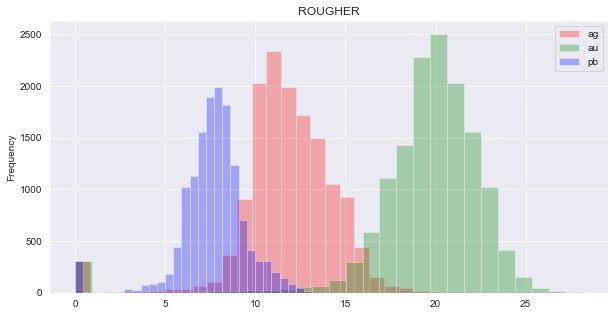

In [85]:
plt.title("ROUGHER")
plotting_hist(rougher_ag,'ag' , 'red')
plotting_hist(rougher_au, 'au', 'green')
plotting_hist(rougher_pb, 'pb', 'blue')
plt.show()

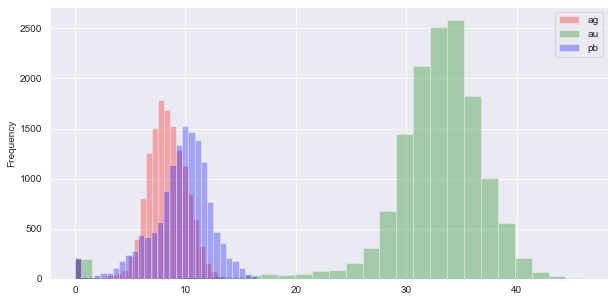

In [86]:
plotting_hist(primary_ag,'ag' , 'red')
plotting_hist(primary_au,'au' , 'green')
plotting_hist(primary_pb,'pb' , 'blue')

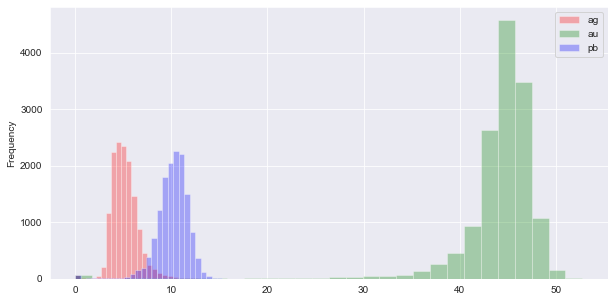

In [87]:
plotting_hist(secondary_ag,'ag' , 'red')
plotting_hist(secondary_au,'au' , 'green')
plotting_hist(secondary_pb,'pb' , 'blue')


Легко можно заметить тенденцию - с последующими этапами обработки концентрация вырывается впредёт и с каждым этапом показывает все лучшие и лучшие значения, в отличии от серебра и олова. Серебро, например, только ухудшает свои показатели, а концетрация олова практически не меняется.

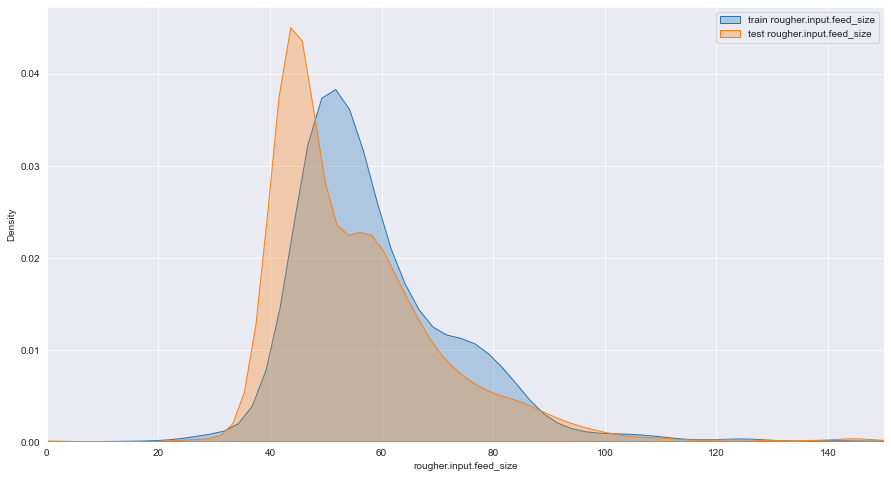

In [88]:
sns.kdeplot(train_data['rougher.input.feed_size'], label='train rougher.input.feed_size', alpha=0.3, shade=True);
sns.kdeplot(test_data['rougher.input.feed_size'], label='test rougher.input.feed_size', alpha=0.3, shade=True);
plt.xlim(0, 150);
plt.gcf().set_size_inches(15, 8)
plt.legend()
plt.show()

На первый взгляд распределения достаточно близки, хоть и не идеально совпадают. А значит можно сделать вывод о том что оценки моделей на двух множествах будут сравнимы.

Соберем все необходимые данные воедино.

In [89]:
train_data['sum_concentrate_rougher']=train_data['rougher.output.concentrate_ag']+train_data['rougher.output.concentrate_pb']+train_data['rougher.output.concentrate_sol']+train_data['rougher.output.concentrate_au']


train_data['sum_primary_cleaner_output_concentrate']=train_data['primary_cleaner.output.concentrate_ag']+train_data['primary_cleaner.output.concentrate_pb']+train_data['primary_cleaner.output.concentrate_sol']+train_data['primary_cleaner.output.concentrate_au']


train_data['sum_final_output_concentrate']=train_data['final.output.concentrate_ag']+train_data['final.output.concentrate_pb']+train_data['final.output.concentrate_sol']+train_data['final.output.concentrate_au']



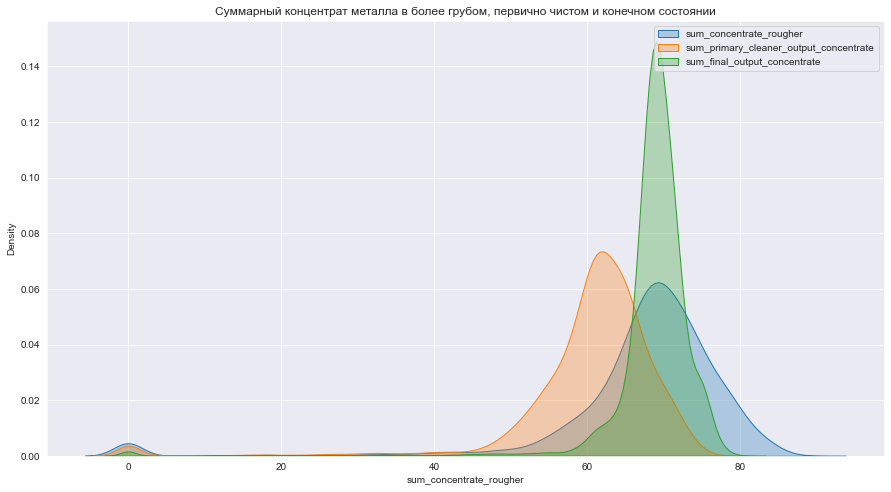

In [90]:
sns.kdeplot(train_data['sum_concentrate_rougher'], label='sum_concentrate_rougher', alpha=0.3, shade=True);
plt.legend()
sns.kdeplot(train_data['sum_primary_cleaner_output_concentrate'], label='sum_primary_cleaner_output_concentrate', alpha=0.3, shade=True);
plt.legend()
sns.kdeplot(train_data['sum_final_output_concentrate'], label='sum_final_output_concentrate', alpha=0.3, shade=True);
plt.legend()
plt.title('Суммарный концентрат металла в более грубом, первично чистом и конечном состоянии');
plt.gcf().set_size_inches(15, 8)


В общем и целом - как и должно быть, с каждой стадией концентрация возрастает.

Имеются выбросы - по распределению видно, что присутствуют выбросы. Есть много значению от 0 до 40, которые можно удалить. их очень много,а чистота их нулевая. Поэтому, думаю можно их удалить, чтобы не мешали обучению модели.

In [91]:
train_data=train_data[train_data['sum_final_output_concentrate']>40]
train_data=train_data[train_data['sum_primary_cleaner_output_concentrate']>40]
train_data=train_data[train_data['sum_concentrate_rougher']>40]
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_concentrate_rougher,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667


## Модель

Реализуем функцию метрики sMAPE.

In [92]:
def smape (predict, target):
    smape = abs(target-predict)/((abs(target)+abs(predict))/2)*100
    smape=smape.fillna(value=0)
    smape = sum(smape)/len(smape)
    return smape

А также функцию scorer, она нам потребуется при кросс-валидации.

In [93]:
def sMape_scorer(model, features, target):
    pred = model.predict(features)
    sMAPE_ = smape(target, pred)
    return sMAPE_


Первым делом будем искать лучшую модель для целевого признака - rougher.output.recovery. Проверим на дереве, лесе и линейной регрессии.

In [94]:
rougher_columns = [c for c in test_data.columns if "rougher" in c]  # Берем только признаки rougher
x_rougher = train_data[rougher_columns]
y_rougher = train_data['rougher.output.recovery']

In [95]:
rfc = DecisionTreeRegressor(random_state=12345)

parametrs = {'max_depth': range(1, 11, 2)}  # глубина

grid = GridSearchCV(rfc, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_rougher, y_rougher)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')


Лучший счет отрицательный так как мы указали параметр greater_is_better=False.

Лучшие параметры: {'max_depth': 5, 'n_estimators': 20}

Лучший счет: -6.2811622171682995

CPU times: total: 2min 22s
Wall time: 2min 22s

In [96]:
%%time
#Лучшие параметры: {'max_depth': 5, 'n_estimators': 20}
rougher_columns = [c for c in test_data.columns if "rougher" in c] # Берем только признаки rougher
x_rougher = train_data[rougher_columns]
y_rougher = train_data['rougher.output.recovery']

rfc = RandomForestRegressor(random_state=12345)

parametrs = { 'n_estimators': range (10, 41, 10), # число деревьев в лесу
              'max_depth': range (1,11, 2)} # глубина

grid = GridSearchCV(rfc, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_rougher, y_rougher)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

Так как валидационная выборка отсутствует, а гипперпараметров у линейной регрессии нет, по крайней мере тех, о которых мы знаем, придеться вручную разбить и посчитать метрику.

In [97]:
from sklearn.model_selection import train_test_split

features_train_r, features_valid_r, target_train_r, target_valid_r = train_test_split(
    x_rougher, y_rougher, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_r, target_train_r)
predictions_valid_r = model.predict(features_valid_r)

scores = cross_val_score(model, x_rougher, y_rougher, cv=5, scoring=make_scorer(smape))

final_score = sum(scores)/len(scores)

print(final_score)

Проведем аналогичные действия для второго целевого признака - final.output.recovery.

In [98]:
final_columns = [c for c in test_data.columns]
x_final = train_data[final_columns].drop('date', axis=1)

y_final = train_data['final.output.recovery']


In [99]:
rfc = DecisionTreeRegressor(random_state=12345)

parametrs = {'max_depth': range(1, 11, 2)}  # глубина

grid = GridSearchCV(rfc, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_final, y_final)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')


Лучшие параметры: {'max_depth': 3, 'n_estimators': 20}

Лучший счет: -8.741313112761201

CPU times: total: 5min 33s
Wall time: 5min 33s

In [100]:
%%time
# Лучшие параметры: {'max_depth': 3, 'n_estimators': 20}
rfc = RandomForestRegressor(random_state=12345)

parametrs = { 'n_estimators': range (10, 41, 10), # число деревьев в лесу
              'max_depth': range (1,11, 2)} # глубина

grid = GridSearchCV(rfc, parametrs, cv=5, scoring=make_scorer(smape, greater_is_better=False))
grid.fit(x_final, y_final)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучший счет:', grid.best_score_, '\n')

In [101]:
from sklearn.model_selection import train_test_split

features_train_f, features_valid_f, target_train_f, target_valid_f = train_test_split(
    x_final, y_final, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_f, target_train_f)
predictions_valid_f = model.predict(features_valid_f)

scores = cross_val_score(model, x_final, y_final, cv=5, scoring=make_scorer(smape))

final_score = sum(scores)/len(scores)

print(final_score)

Таким образом для обоих целевых признаков лучшей моделью оказался случайный лес, правда с разными гипперпараметрами.

Подсчитаем итоговое sMAPE.

In [102]:
data_test = pd.merge(test_data, full_data[['date', 'rougher.output.recovery']], on='date')
data_test = data_test.fillna(method='ffill')

In [103]:
rougher_columns = [c for c in data_test.columns if "rougher" in c]
x_rougher_features = data_test[rougher_columns].drop('rougher.output.recovery', axis=1)


In [104]:
best_model_rougher = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=20)
best_model_rougher.fit(x_rougher, y_rougher)
predicted_rough = best_model_rougher.predict(x_rougher_features)
smape_rougher = smape(predicted_rough, data_test['rougher.output.recovery'])

In [105]:
data_test = pd.merge(test_data, full_data[['date', 'final.output.recovery']], on='date')
data_test = data_test.fillna(method='ffill')
x_final_features = data_test.drop(['final.output.recovery', 'date'], axis=1)


In [106]:
best_model_final = RandomForestRegressor(random_state=12345, max_depth=3, n_estimators=20)
best_model_final.fit(x_final, y_final)
predicted_final = best_model_final.predict(x_final_features)
smape_final = smape(predicted_final, data_test['final.output.recovery'])

In [107]:
0.25 * smape_rougher + 0.75 * smape_final

9.143445584037108

Итоговое sMAPE составляет 9.14! Довольно близко к нулю.

## Вывод

В данном проекте была проведена большая работа с данными. Они были получены из трех csv файлов. После осмотра были сделаны первичные выводы. Была реализована формула подсчета rougher.output.recovery и проверена успешно. Было обнаружено, каких именно признаков не хватает в тестовой выборке и почему. Также в признаках было очень много пропусков, но сделав небольшие выводы все они были заполнены методом forward fill, так как данные записывались каждый час. Были построенные распределения, на которых можно было увидеть, что концентрация золота с каждым этапом росла, в отличие от серебра и олова. Распределения гранул сырья оказалось одинаковым, так что это не помешало оценки модели. Также рассмотрели общую концентрацию всех веществ на разных стадиях обработки, и как ожидалось, с каждым этапом она возрастала. Реализовали функцию метрики *sMAPE*, с помощью кросс-валидации оценили 6 моделей и подобрали лучшие гипперпараметры. С лучшей стороны себя показал случайный лес, его мы и использовали для подсчета итогового *sMAPE* оно равно 9.14, что вполне приемлемо!